In [115]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [116]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [117]:
file = "All_ConsumptionSum.xlsx"

store_sum = pd.read_excel(file,sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
store_sum.columns=['num','연도','상권','업종','값']
#store_sum.drop('num',axis=1,inplace = True)

In [118]:
file = "All_ConsumptionRate.xlsx"

store_rate = pd.read_excel(file,sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
store_rate.columns=['num','연도','상권','업종','값']
#store_rate.drop('num',axis=1,inplace = True)

In [119]:
store_sum

,num,연도,상권,업종,값
0,0,2020,발달상권,컴퓨터및주변장치판매,38362266773
1,1,2020,발달상권,컴퓨터및주변장치판매,35284177853
2,2,2020,발달상권,수산물판매,29522251103
3,3,2020,발달상권,컴퓨터및주변장치판매,26935041548
4,4,2020,발달상권,컴퓨터및주변장치판매,26411589363
...,...,...,...,...,...
395,95,2020,발달상권,일반의류,6246738964
396,96,2020,골목상권,의료기기,6182710682
397,97,2020,전통시장,청과상,6175283483
398,98,2020,전통시장,청과상,6077563411


In [120]:
store_rate

,num,연도,상권,업종,값
0,0,2020,발달상권,커피-음료,1184669
1,1,2020,발달상권,편의점,1143049
2,2,2020,발달상권,일반의류,1105057
3,3,2020,발달상권,편의점,1090943
4,4,2020,발달상권,커피-음료,1071003
...,...,...,...,...,...
395,95,2020,발달상권,편의점,123292
396,96,2020,발달상권,편의점,122640
397,97,2020,발달상권,가전제품,122526
398,98,2020,관광특구,커피-음료,121710


# 매출금액과 그 횟수로 클러스터링

In [121]:
#매출금액 총합과 빈도수를 구하여 새로운 데이터 프레임 생성
#연령 구분을 위해 '연령' column을 추가한다

S=store_sum.iloc[:100,].groupby('업종')['값'].sum()
S_20=pd.DataFrame(S)
C=store_sum.iloc[:100,].groupby('업종')['값'].count()
C_20=pd.DataFrame(C)
S_20['빈도수']=C_20['값']
S_20['연령']=20

S=store_sum.iloc[100:200,].groupby('업종')['값'].sum()
S_30=pd.DataFrame(S)
C=store_sum.iloc[100:200,].groupby('업종')['값'].count()
C_30=pd.DataFrame(C)
S_30['빈도수']=C_30['값']
S_30['연령']=30

S=store_sum.iloc[200:300,].groupby('업종')['값'].sum()
S_40=pd.DataFrame(S)
C=store_sum.iloc[200:300,].groupby('업종')['값'].count()
C_40=pd.DataFrame(C)
S_40['빈도수']=C_40['값']
S_40['연령']=40

S=store_sum.iloc[100:200,].groupby('업종')['값'].sum()
S_50=pd.DataFrame(S)
C=store_sum.iloc[100:200,].groupby('업종')['값'].count()
C_50=pd.DataFrame(C)
S_50['빈도수']=C_50['값']
S_50['연령']=50

In [122]:
Sum = S_20.append(S_30).append(S_40).append(S_50)

In [123]:
Sum

,값,빈도수,연령
업종,,,
가전제품,21891747960,2,20
반찬가게,16114519735,2,20
수산물판매,50078779978,2,20
슈퍼마켓,10588766972,2,20
시계및귀금속,26976763385,4,20
...,...,...,...
조명용품,16174151233,2,50
청과상,50942779045,4,50
컴퓨터및주변장치판매,278162081497,12,50


In [124]:
#클러스터링에 불필요한 연령 삭제
sum_kmeans=Sum.drop('연령',axis=1)

In [125]:
sum_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 가전제품 to 화장품
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   값       65 non-null     int64
 1   빈도수     65 non-null     int64
dtypes: int64(2)
memory usage: 1.5+ KB


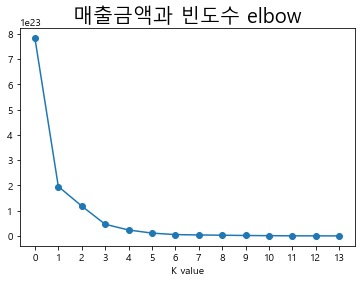

In [127]:
#print('Distortion : %.2f' % km.inertia)

distortions = []
for i in range(1,15):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(sum_kmeans)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('매출금액과 빈도수 elbow',size=20)
plt.rcParams['figure.figsize']=[6,4]
plt.show()

In [128]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(sum_kmeans)

KMeans(n_clusters=3, random_state=0)

In [129]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 2 1 0 0 0 1 0 0]


In [130]:
Sum['cluster']=kmeans.labels_
sum_kmeans['cluster']=kmeans.labels_

In [131]:
Sum=Sum.reset_index()
Sum.head(3)

,업종,값,빈도수,연령,cluster
0,가전제품,21891747960,2,20,0
1,반찬가게,16114519735,2,20,0
2,수산물판매,50078779978,2,20,0


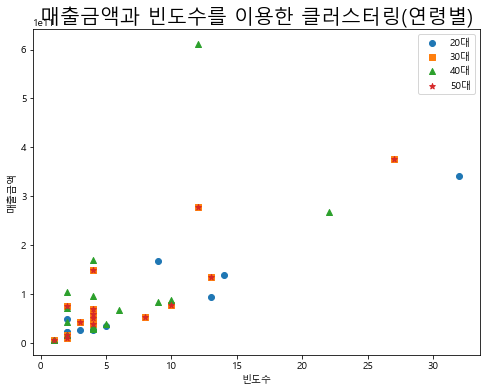

In [135]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Sum[Sum['연령']==20].index
marker1_ind= Sum[Sum['연령']==30].index
marker2_ind =Sum[Sum['연령']==40].index
marker3_ind = Sum[Sum['연령']==50].index
#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Sum.loc[marker0_ind,'빈도수'],y=Sum.loc[marker0_ind,'값'],marker='o',label='20대')
plt.scatter(x=Sum.loc[marker1_ind,'빈도수'],y=Sum.loc[marker1_ind,'값'],marker='s',label='30대')
plt.scatter(x=Sum.loc[marker2_ind,'빈도수'],y=Sum.loc[marker2_ind,'값'],marker='^',label='40대')
plt.scatter(x=Sum.loc[marker3_ind,'빈도수'],y=Sum.loc[marker3_ind,'값'],marker='*',label='50대')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('빈도수')
plt.ylabel('매출금액')
plt.title('매출금액과 빈도수를 이용한 클러스터링(연령별)',size=20)
plt.legend()
plt.show()

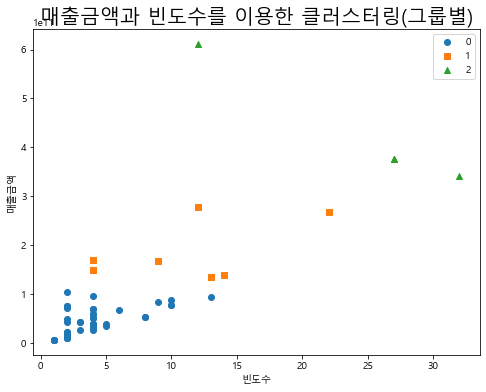

In [137]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Sum[Sum['cluster']==0].index
marker1_ind= Sum[Sum['cluster']==1].index
marker2_ind = Sum[Sum['cluster']==2].index
#marker3_ind =  Sum[Sum['cluster']==3].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Sum.loc[marker0_ind,'빈도수'],y=Sum.loc[marker0_ind,'값'],marker='o',label='0')
plt.scatter(x=Sum.loc[marker1_ind,'빈도수'],y=Sum.loc[marker1_ind,'값'],marker='s',label='1')
plt.scatter(x=Sum.loc[marker2_ind,'빈도수'],y=Sum.loc[marker2_ind,'값'],marker='^',label='2')
#plt.scatter(x=Sum.loc[marker3_ind,'빈도수'],y=Sum.loc[marker3_ind,'값'],marker='*',label='50대')

plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('빈도수')
plt.ylabel('매출금액')
plt.title('매출금액과 빈도수를 이용한 클러스터링(그룹별)',size=20)
plt.legend()
plt.show()

In [138]:
Sum[Sum['cluster']==0]

,업종,값,빈도수,연령,cluster
0,가전제품,21891747960,2,20,0
1,반찬가게,16114519735,2,20,0
2,수산물판매,50078779978,2,20,0
3,슈퍼마켓,10588766972,2,20,0
4,시계및귀금속,26976763385,4,20,0
5,신발,13087829799,2,20,0
6,양식음식점,12609287079,2,20,0
7,의료기기,21564792091,2,20,0
10,전자상거래업,38631045434,4,20,0
11,커피-음료,25911840373,3,20,0


In [139]:
Sum[Sum['cluster']==1]

,업종,값,빈도수,연령,cluster
9,일반의원,140197754301,14,20,1
12,컴퓨터및주변장치판매,168553111854,9,20,1
18,수산물판매,148982917073,4,30,1
24,일반의원,134387325406,13,30,1
28,컴퓨터및주변장치판매,278162081497,12,30,1
34,수산물판매,169057155391,4,40,1
42,일반의류,266976553466,22,40,1
52,수산물판매,148982917073,4,50,1
58,일반의원,134387325406,13,50,1
62,컴퓨터및주변장치판매,278162081497,12,50,1


In [140]:
Sum[Sum['cluster']==2]

,업종,값,빈도수,연령,cluster
8,일반의류,342334323588,32,20,2
23,일반의류,376032249210,27,30,2
47,컴퓨터및주변장치판매,612141380513,12,40,2
57,일반의류,376032249210,27,50,2


# 매출건수와 빈도수로 클러스터링

In [146]:
#매출금액 총합과 빈도수를 구하여 새로운 데이터 프레임 생성
#연령 구분을 위해 '연령' column을 추가한다

S=store_rate.iloc[:100,].groupby('업종')['값'].sum()
S_20=pd.DataFrame(S)
C=store_rate.iloc[:100,].groupby('업종')['값'].count()
C_20=pd.DataFrame(C)
S_20['빈도수']=C_20['값']
S_20['연령']=20

S=store_rate.iloc[100:200,].groupby('업종')['값'].sum()
S_30=pd.DataFrame(S)
C=store_rate.iloc[100:200,].groupby('업종')['값'].count()
C_30=pd.DataFrame(C)
S_30['빈도수']=C_30['값']
S_30['연령']=30

S=store_rate.iloc[200:300,].groupby('업종')['값'].sum()
S_40=pd.DataFrame(S)
C=store_rate.iloc[200:300,].groupby('업종')['값'].count()
C_40=pd.DataFrame(C)
S_40['빈도수']=C_40['값']
S_40['연령']=40

S=store_rate.iloc[100:200,].groupby('업종')['값'].sum()
S_50=pd.DataFrame(S)
C=store_rate.iloc[100:200,].groupby('업종')['값'].count()
C_50=pd.DataFrame(C)
S_50['빈도수']=C_50['값']
S_50['연령']=50

In [147]:
Rate= S_20.append(S_30).append(S_40).append(S_50)

In [148]:
len(Rate)

51

In [149]:
rate_kmeans=Rate.drop('연령',axis=1)

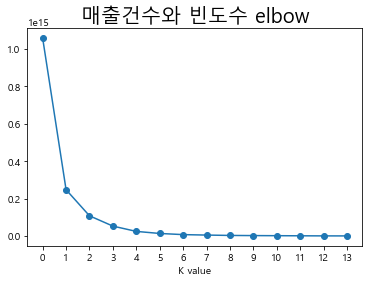

In [150]:
#print('Distortion : %.2f' % km.inertia)

distortions = []
for i in range(1,15):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(rate_kmeans)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('매출건수와 빈도수 elbow',size=20)
plt.rcParams['figure.figsize']=[6,4]
plt.show()

In [151]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(rate_kmeans)

KMeans(n_clusters=3, random_state=0)

In [152]:
print(kmeans.labels_)

[1 1 1 1 0 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 2 1]


In [153]:
Rate['cluster']=kmeans.labels_
rate_kmeans['cluster']=kmeans.labels_

In [154]:
Rate=Rate.reset_index()
Rate.head(3)

,업종,값,빈도수,연령,cluster
0,PC방,2854533,6,20,1
1,반찬가게,2093705,4,20,1
2,수산물판매,795888,2,20,1


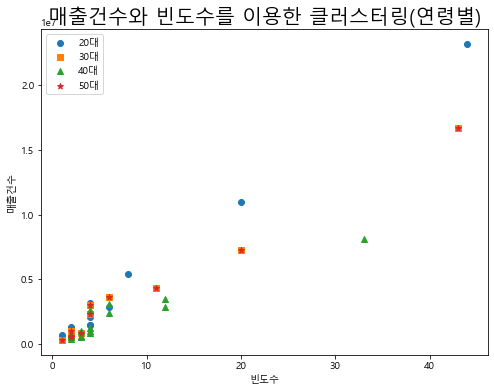

In [157]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Rate[Rate['연령']==20].index
marker1_ind= Rate[Rate['연령']==30].index
marker2_ind =Rate[Rate['연령']==40].index
marker3_ind = Rate[Rate['연령']==50].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Rate.loc[marker0_ind,'빈도수'],y=Rate.loc[marker0_ind,'값'],marker='o',label='20대')
plt.scatter(x=Rate.loc[marker1_ind,'빈도수'],y=Rate.loc[marker1_ind,'값'],marker='s',label='30대')
plt.scatter(x=Rate.loc[marker2_ind,'빈도수'],y=Rate.loc[marker2_ind,'값'],marker='^',label='40대')
plt.scatter(x=Rate.loc[marker3_ind,'빈도수'],y=Rate.loc[marker3_ind,'값'],marker='*',label='50대')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('빈도수')
plt.ylabel('매출건수')
plt.title('매출건수와 빈도수를 이용한 클러스터링(연령별)',size=20)
plt.legend()
plt.show()

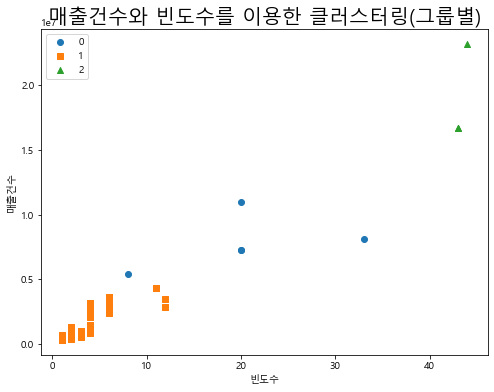

In [156]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Rate[Rate['cluster']==0].index
marker1_ind= Rate[Rate['cluster']==1].index
marker2_ind = Rate[Rate['cluster']==2].index
#marker3_ind =  Rate[Rate['cluster']==3].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Rate.loc[marker0_ind,'빈도수'],y=Rate.loc[marker0_ind,'값'],marker='o',label='0')
plt.scatter(x=Rate.loc[marker1_ind,'빈도수'],y=Rate.loc[marker1_ind,'값'],marker='s',label='1')
plt.scatter(x=Rate.loc[marker2_ind,'빈도수'],y=Rate.loc[marker2_ind,'값'],marker='^',label='2')
#plt.scatter(x=Rate.loc[marker3_ind,'pca_x'],y=Rate.loc[marker3_ind,'pca_y'],marker='*',label='3')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('빈도수')
plt.ylabel('매출건수')
plt.title('매출건수와 빈도수를 이용한 클러스터링(그룹별)',size=20)
plt.legend()
plt.show()